# What are the most common words used in Airbnb descriptions

In [1]:
#Import neccesary libraries
import pandas as pd 
import seaborn as sns
from portion_of_na import portion_of_na
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
#read in listing csv's
boston_listing = pd.read_csv("BostonData/listings.csv")
seattle_listing = pd.read_csv("SeattleData/listings.csv")

In [3]:
#take a look at dataframes
boston_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [4]:
seattle_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [5]:
#concatenate the data frames
combined_listings =  pd.concat([boston_listing,seattle_listing], axis = 0)

## Take a look at the data the description column (that is what we are working with)

In [6]:
print(combined_listings.description.dtype)

object


It's a string as expected, lets see how much data we are missing

In [7]:
printna = lambda col : print(col.name + ":  " + str(portion_of_na(col)))
combined_listings.apply(printna)


id:  0.0
listing_url:  0.0
scrape_id:  0.0
last_scraped:  0.0
name:  0.0
summary:  0.04322571930298528
space:  0.21964068620829394
description:  0.0
experiences_offered:  0.0
neighborhood_overview:  0.3305416722950155
notes:  0.4837228150749696
transit:  0.3004187491557477
access:  0.7168715385654464
interaction:  0.7256517627988653
house_rules:  0.6767526678373632
thumbnail_url:  0.12413886262326083
medium_url:  0.12413886262326083
picture_url:  0.0
xl_picture_url:  0.12413886262326083
host_id:  0.0
host_url:  0.0
host_name:  0.00027016074564365796
host_since:  0.00027016074564365796
host_location:  0.002566527083614751
host_about:  0.29285424827772527
host_response_time:  0.13426989058489802
host_response_rate:  0.13426989058489802
host_acceptance_rate:  0.16803998379035526
host_is_superhost:  0.00027016074564365796
host_thumbnail_url:  0.00027016074564365796
host_picture_url:  0.00027016074564365796
host_neighbourhood:  0.08631635823314872
host_listings_count:  0.0002701607456436579

id                                  None
listing_url                         None
scrape_id                           None
last_scraped                        None
name                                None
summary                             None
space                               None
description                         None
experiences_offered                 None
neighborhood_overview               None
notes                               None
transit                             None
access                              None
interaction                         None
house_rules                         None
thumbnail_url                       None
medium_url                          None
picture_url                         None
xl_picture_url                      None
host_id                             None
host_url                            None
host_name                           None
host_since                          None
host_location                       None
host_about      

Seems like there are no missing descriptions, awesome!

# Process the data using nltk and pandas

In [8]:
#count the most common words, with help from https://stackoverflow.com/questions/29903025/count-most-frequent-100-words-from-sentences-in-dataframe-pandas
#get list of words
words = " ".join(combined_listings.description).lower().split()
#import necessary nltk objects
from nltk.corpus import stopwords
from string import punctuation
stop_words = stopwords.words('english')
#take out stop_words
no_stop_words = [word for word in words if word not in stop_words]
#get a list  of 100 most used words from most common english words, taken from 

with open("most_common.txt") as file:
    most_common_list = file.read().splitlines()
#take the 100 most common words in english
most_common_100 = most_common_list[:100]
#remove most common 100 words from our list of words in the description
most_common_words_penulatimate = [word for word in no_stop_words if word not in most_common_100]
#remove punctuation
most_common_final_list = [word for word in most_common_words_penulatimate if word not in punctuation]
#convert to series, and count values
most_common_words = pd.DataFrame(pd.Series(most_common_final_list).value_counts()).reset_index()

#take a look at the most common words in our data that arnt simply the most common words in english
most_common_words.head()


,index,0
0,room,5341
1,apartment,4732
2,bedroom,4037
3,walk,3949
4,private,3852


In [9]:
#rename the two columns
most_common_words.rename(mapper= {"index": "word" , 0 : "count"}, axis = 1,inplace=True)
#check it out the 
most_common_words.head()

,word,count
0,room,5341
1,apartment,4732
2,bedroom,4037
3,walk,3949
4,private,3852


# Visualize the data

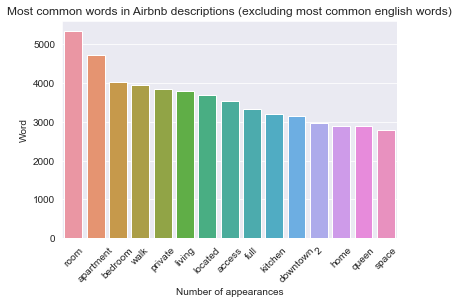

In [10]:
#graph the 15 most common words with seaborn
most_common_15 =  most_common_words[:15]
sns.set_style("darkgrid")
plot = sns.barplot(data=most_common_15, x= "word", y = "count")
plot.set_title("Most common words in Airbnb descriptions (excluding most common english words)")
plot.set_ylabel("Word")
plot.set_xlabel("Number of appearances")
plot.tick_params(axis = 'x', labelsize = 10, rotation = 45)


# Conclusion
After ignoring the most common words in english like "to" and "the" it seems the most common words used in AirBNB are related to mostly location and the living space, which is not suprising. 